# CLUSTER ANALYSIS ON FORMAULATIONS OF PETROLEUM

This work is intended to identify if the formulations (observations) are significantly different from each other by doing so, we can identify the number of formulations that are similar.  

The ingredient.csv file contains various formulations of petroleum using additives a, b, c, d, e, f, g, h and i. The additive names are confidentail and hence characters are used instead of actual additive names.




Cluster Analysis is an Unsupervised machine Learning technique in which we do not know what is the expected output class unlike Supervised Machine learning methods. The purpose of cluster analysis is to identify various segments, groups or clusters in the dataset by grouping the observations based on datapoints. Clustering algorithms helps us identify unexpected things in the observations which we would not thought of otherwise. 

In the current work, K-Means and Hierarchical Clustering algorithms are considered for identifying various clusters in the petroleum formulation data.

### Getting the Dataset
A project by the name 'Additive Analysis' is created in the Azureml studio and the dataset 'ingredient.csv' is added as a dataset in the project. Code in the below cell is used for importing the dataset into the current working directory of the notebook to work on the dataset using python.

In [1]:
"""
#This line is for getting the dataset from the Azure workspace environment
import matplotlib.pyplot as plt
from azureml import Workspace
ws = Workspace()
dataset = ws.datasets['ingredient.csv']
addit_data = dataset.to_dataframe()
"""
import pandas as pd
import matplotlib.pyplot as plt
addit_data = pd.read_csv('../ingredient.csv')

In [2]:
addit_data

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


The above data can be described to have 214 observations or formulations with 9 different additives a to i.

### Elbow Plot

Identifying number of clusters or segments the formulations can be divided into is achieved by Elbow plot when a K-Means clustering algorithm is considered. As an assumption, let us consider 10 clusters initially.

In [3]:
from sklearn.cluster import KMeans

To identify the acceptable number of clusters, let us calculate the Within Cluster Sum of Squared (WCSS) for each cluster from 1 to 10 and observe the significant drops for each cluster as we go on.

In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 10)
    kmeans.fit(addit_data)
    wcss.append(kmeans.inertia_)
print(wcss)

[1342.757046644303, 819.6292544515811, 589.0314496288754, 489.0405214469389, 400.4981746098393, 336.6287861121675, 292.8423071754911, 266.72903408820025, 245.35092231886676, 229.02890717661916]


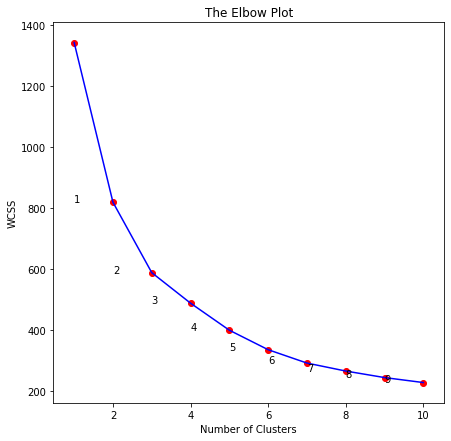

In [5]:
plt.rcParams["figure.figsize"] = (7,7)
plt.plot(range(1,11), wcss, color = 'blue')
plt.scatter(range(1,11), wcss, color = 'r')
for i in range(10):
    plt.annotate(s=i, xy=(i,wcss[i]))
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Using KMeans clustering, it is observed that the elbow is significantly bent at cluster 3. We can only divide the entire data into a 3 clusters reasonably using the KMeans clustering algorithm. But this does not address our problem to identify if each formulation is significantly differrent from others.

For a problem like this, it is better to use a Hierarchical Clustering approach where there is an option to choose the optimal number nth cluster depending on the problem we are  trying to address. The bottoms up approach in hierarchical cluster considers every data point in the dataset as a cluster and continues to link datapoints in a cluster if the distance is less than the mean cluster distance. This is carried on until all the data comes under a single cluster. 


## Agglomorative Hierarchical Clustering 

In [6]:
data_array = addit_data.iloc[:,:].values


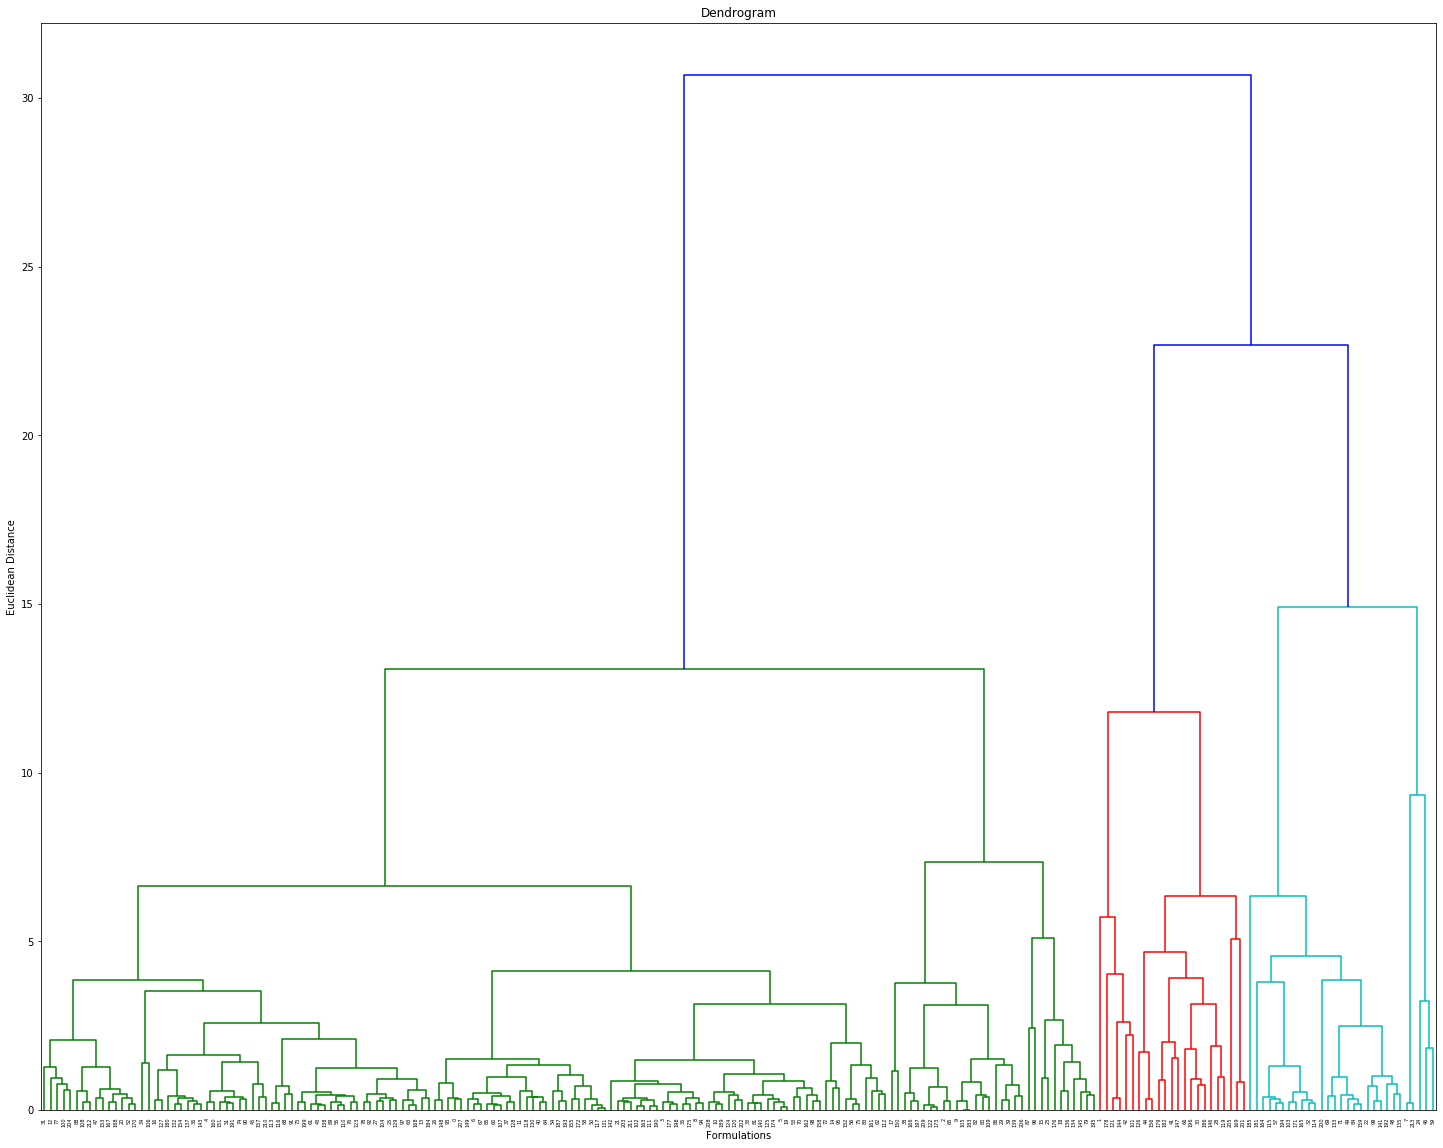

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_array, method = 'ward'))
plt.rcParams["figure.figsize"] = (25,20)
plt.title('Dendrogram')
plt.xlabel('Formulations')
plt.ylabel('Euclidean Distance')
plt.show()

From the above Dendrogram, it can be observed that the dataset can be largely dividen into 3 clusters. This is the same result as seen from the Elbow plot.

#### Euclidean Distance
Significant difference between two formulations in the dataset can be determined by the 'Euclidean Distance' between the datapoints. However, the minimum Eucidean Distance in this case can be determined with the help of SME.
For example, Formulation A and Formulation B are two poitns in the dataset which are significantly different but with the least Euclidean distance between them. Data points with less than this are considered not significantly different. Calculating this distance would need an understanding of the formulations and its features. For the current case, lets assume the value of this Euclidean Distance.

Details of the Euclidean distances in our data can be found from the below code

In [8]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = len(data_array), algorithm='auto', metric='euclidean').fit(data_array)
distances, indices = nbrs.kneighbors(data_array)

all_euclidean_distances = []
for i in range(len(distances)):
    dist=distances[i]
    for d in dist:
        all_euclidean_distances.append(d)

#remove distance 0.0 from the list as 0 is the distance of the point with itself
all_euclidean_distances = list(filter(lambda a: a!=0.0, all_euclidean_distances))

In [9]:
print('Smallest Euclidean Distance : ',min(all_euclidean_distances))
print('Largest Euclidean Distance : ',max(all_euclidean_distances))
from statistics import mean
print('Average Euclidean Distance : ',mean(all_euclidean_distances))

Smallest Euclidean Distance :  0.07681148091197451
Largest Euclidean Distance :  12.036968843043514
Average Euclidean Distance :  2.901818564119686


From the above printed output, the smallest euclidean distance between the formulations in the dataset is 0.076 and the largest distance is 12.036. The optimal Euclidean Distance determind with the help of an SME can be between these 2 values. Lets assume the optimal value of Euclidean Distance for the formulations to be significantly different is 0.5.

### Clustering the data based on the Euclidean Distance

Lets create a variable 'min_ed' for storing the assumed Eulidean Distance as shown below

In [10]:
# min_ed stores the optimum Euclidean Distance between the datapoints which are significantly different. 0.5 as assumed above.
opt_ed = 0.5
#opt_ed = 0.7 this divided the formulations into 88 clusters
#opt_ed = 1.2 this divided the formulations into 58 clusters

In [11]:
#Fitting the Hierarchical Clustering the additive formulation dataset
from sklearn.cluster import AgglomerativeClustering
h_clstr_Obj = AgglomerativeClustering(n_clusters = None,affinity='euclidean', linkage='ward', distance_threshold=opt_ed)
data_clustered = h_clstr_Obj.fit_predict(data_array)
print('Numer of Clusters : {}'.format(max(data_clustered)))
addit_data['cluster'] = data_clustered
max_clusters = max(data_clustered)

Numer of Clusters : 107


The petroleum formulations are divided into 107 clusters when we assumed an optimum Ecludian Distance for significant difference of 0.5.

The following method 'getFormulationsOfCluster' returns the records in the dataset of the cluster passed as a parameter to this function.

In [12]:
##Method to return the formulations for a given cluster number
def getFormulationsOfCluster(clstr_no):
    if clstr_no > max_clusters:
        #if the parameter clstr_no is greater than the max_clusters then return error msg
        return 'Error : Exceeded max cluster count '+str(max_clusters)
    else:
        return addit_data[addit_data['cluster']==clstr_no]

The following lines of code is to call the 'getFormulationsOfCluster' with different cluster numbers.

In [13]:
print('Additive Formulations from cluster 1###################################')
print(getFormulationsOfCluster(1),'\n')
print('Additive Formulations from cluster 54##################################')
print(getFormulationsOfCluster(54),'\n')
print('Additive Formulations from cluster 27##################################')
print(getFormulationsOfCluster(27),'\n')
print('Additive Formulations from cluster 100#################################')
print(getFormulationsOfCluster(100))

Additive Formulations from cluster 1###################################
           a      b     c     d      e     f     g    h     i  cluster
25   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00        1
27   1.51754  13.39  3.66  1.19  72.79  0.57  8.27  0.0  0.11        1
78   1.51687  13.23  3.54  1.48  72.84  0.56  8.10  0.0  0.00        1
92   1.51625  13.36  3.58  1.49  72.72  0.45  8.21  0.0  0.00        1
104  1.51646  13.41  3.55  1.25  72.81  0.68  8.10  0.0  0.00        1
129  1.51811  13.33  3.85  1.25  72.78  0.52  8.12  0.0  0.00        1 

Additive Formulations from cluster 54##################################
           a      b     c     d      e     f     g    h     i  cluster
56   1.51837  13.14  2.84  1.28  72.85  0.55  9.07  0.0  0.00       54
75   1.51778  13.21  2.81  1.29  72.98  0.51  9.02  0.0  0.09       54
152  1.51808  13.43  2.87  1.19  72.84  0.55  9.03  0.0  0.00       54 

Additive Formulations from cluster 27##################################

### Validation

One way of validating the the clustered data is by calculating the Euclidean distance between the formulations between the clusters and within the clusters.
The Euclidean Distance for datapoints between the clusters should be greater than 0.5 and the Euclidean Distance for datapoints within the same cluster should be less than 0.5, where 0.5 is the optimal Euclidean Distance obtained to differentiate the formulations. 

### Prediction
For classifying new formulations into a cluster, we need to develop furthur a Supervised Machine Learnin classification model for which the cluster in the above dataset is used as the class to predict while training the model. The number of classes depends on the number of clusters the formulations are segmented into. For a multi-class classification problems, Random Forest Classification, ANN and XGBoost can be great solutions.

### Conclusion
Thus we can conclude, when it is necessary to identify significant difference of the datapoints using clustering algorithms, additive formulation in our case, this can be achieved using Agglomerative Hierarchical Clustering where the number of clusters can be decided based on a parameterized Euclidean Distance.